### Cap.6 - Matplotlib

imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#abrindo o dataframe csv dos países
df_paises = pd.read_csv(r"C:\Users\lanna\Downloads\paises.csv", delimiter = ';')
print(df_paises.columns) #conferindo suas colunas

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')


Exercício 1 - gerar dois gráficos de linha num mesmo plano cartesiano, um mostrando Deathrate e outro mostrando Birthrate da América do Norte

22                  Bermuda 
36                   Canada 
80                Greenland 
174    St Pierre & Miquelon 
214           United States 
Name: Country, dtype: object


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bermuda '),
  Text(1, 0, 'Canada '),
  Text(2, 0, 'Greenland '),
  Text(3, 0, 'St Pierre & Miquelon '),
  Text(4, 0, 'United States ')])

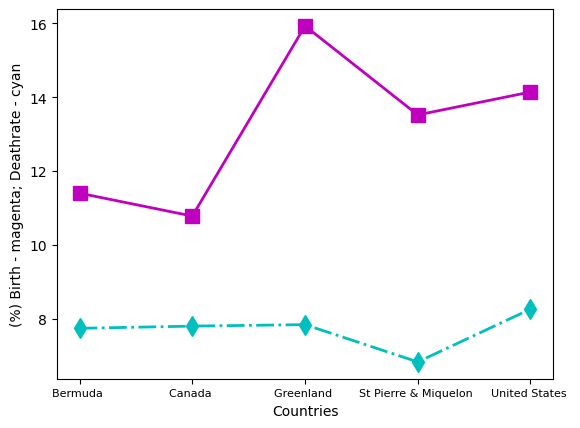

In [34]:
#1°: filtrar a américa do norte
df_northAm = df_paises[df_paises['Region'] == "NORTHERN AMERICA                   "]
#print(df_northAm)

#extraindo a coluna Deathrate
y1 = df_northAm['Deathrate']
#extraindo a coluna Birthrate
y2 = df_northAm['Birthrate']
#nomes dos países da américa do norte
x = df_northAm['Country']

print(x)
#plotando o gráfico
plt.xlabel('Countries')
plt.ylabel('(%) Birth - magenta; Deathrate - cyan')

plt.plot(x, y1, 'd-.c', x, y2, 's-m', linewidth = 2, markersize = 10)

# Define o tamanho da fonte do eixo X -> uma escrita estava por cima da outra
plt.xticks(fontsize = 8)

Exercício 2 - usando space.csv, gerar gráfico de barras mostrando quantas empresas espaciais diferentes os EUA e a CHINA possuem (tirar valores repetidos)

In [3]:
#abrindo o novo dataframe
df_space = pd.read_csv(r"C:\Users\lanna\Downloads\space.csv", delimiter = ';')
print(df_space.columns) #conferindo suas colunas

Index(['Num', 'Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Cost', 'Status Mission'],
      dtype='object')


<BarContainer object of 2 artists>

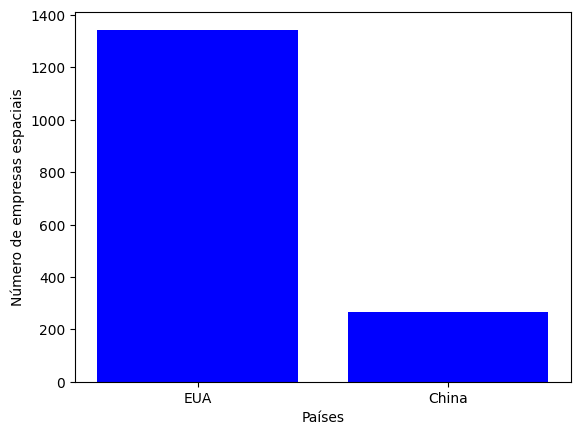

In [ ]:
#separar os valores correspondentes aos países

#filtro para identificar "USA" como substring na 1ª coluna -> location
df_usa = df_space[df_space['Location'].str.contains('USA')]
#print(df_usa)

#filtro para identificar "China" como substring na 1ª coluna -> location
df_china = df_space[df_space['Location'].str.contains('China')]
#print(df_china)

#obter o número de empresas de cada país
empresas_EUA = len(df_usa)
empresas_China = len(df_china)

#concatenar essas informações e estabelecer os eixos y e x
num_companies_y = np.array([empresas_EUA, empresas_China])
countries_X = np.array(["EUA", "China"]) #nomes dos países

#fazer o gráfico de barras
plt.xlabel("Países") #eixo x
plt.ylabel("Número de empresas espaciais") #eixo y

plt.bar(countries_X, num_companies_y, color = 'blue')

Exercício 3 - usando space.csv, gerar um gráfico em torta com a % de missões de Roscosmos que deram certo e errado

([<matplotlib.patches.Wedge at 0x235acb48650>,
 [Text(1.0714131104390903, 0.24914643641688675, 'Missões falhas da Roscosmos (%)'),
  Text(-1.071413104607397, -0.24914646149512037, 'Missões bem sucedidas da Roscosmos (%)')],
 [Text(0.5844071511485947, 0.13589805622739276, '7.27%'),
  Text(-0.5844071479676709, -0.13589806990642928, '92.73%')])

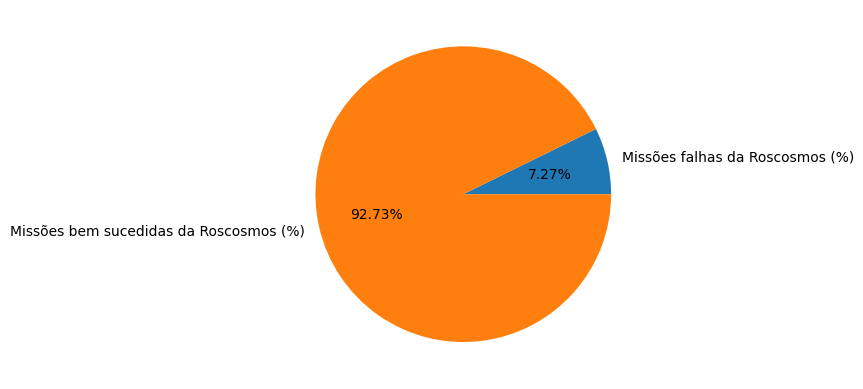

In [ ]:
#filtrar o dataset pelo nome da empresa
df_roscosmos = df_space[df_space['Company Name'] == 'Roscosmos'] #o número de linhas dele seria o total de missões
#print(df_roscosmos)

#missões bem-sucedidas
df_success = df_roscosmos[df_roscosmos['Status Mission'] == 'Success']
#print(df_success)

#missões mal sucedidas 
df_failiure = df_roscosmos[df_roscosmos['Status Mission'] != 'Success']
#print(df_failiure)

#gerando o pie chart
plt.pie(x = [len(df_failiure), len(df_success)], labels = ["Missões falhas da Roscosmos (%)", "Missões bem sucedidas da Roscosmos (%)"], autopct='%1.2f%%') #apresentar as porcentagens com 2 casas após a vírgula
